## Assignment 1 - Additional Results

### Effect of gamma tuning on accuracy, support vectors, fit time, and predict time.
This is a more elaborate investigation of the runtime effects of SVMs. 
It uses a pipeline to first scale the data, cross-validation rather than a single split,
and a larger (5%) sample of the data.
Scaling moves the optimal gamma value to 0.01. Also, we see the same dramatic effect on training time, although this time it stays higher that the prediction time.

In [54]:
%matplotlib inline
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import matplotlib.pyplot as plt
import openml
import numpy as np
import time
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold
from tqdm import tqdm_notebook as tqdm

# Fetch data
fmnist = openml.datasets.get_dataset(40996)
X, y, _, _ = fmnist.get_data(target=fmnist.default_target_attribute);
# small sample to speed up things
Xs, _, ys, _ = train_test_split(X,y, stratify=y, train_size=0.05, shuffle=True, random_state=1) 

gamma_values = np.logspace(-8, 3, num=12)
pipe = make_pipeline(MinMaxScaler(), SVC())

fit_time, predict_time, num_sv, accuracy = [] ,[], [], []
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

for gamma in tqdm(gamma_values):
    pipe.set_params(svc__gamma=gamma)
    cv = cross_validate(pipe, Xs, ys, cv=kfold, return_estimator=True, n_jobs=-1)
    fit_time.append(np.mean(cv['fit_time']))
    predict_time.append(np.mean(cv['score_time']))
    num_sv.append(np.mean([len(m['svc'].support_vectors_) for m in cv['estimator']]))
    accuracy.append(np.mean(cv['test_score']))

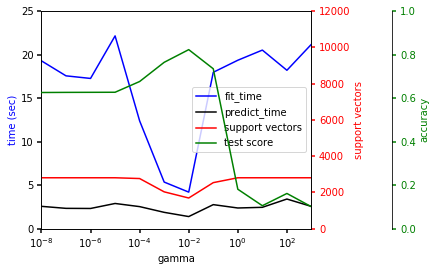

In [64]:
#plotting
fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.spines["right"].set_position(("axes", 1.3))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)

host.set_xlim(gamma_values[0],gamma_values[-1])
host.set_xscale('log')
host.set_xlabel("gamma")
host.set_ylabel("time (sec)")
host.set_ylim(0, 25)
par1.set_ylabel("support vectors")
par1.set_ylim(0, 12000)
par2.set_ylabel("accuracy")
par2.set_ylim(0, 1)

p1, = host.plot(gamma_values, fit_time, "b-", label="fit_time")
p2, = host.plot(gamma_values, predict_time,  "k-", label="predict_time")
p3, = par1.plot(gamma_values, num_sv, "r-", label="support vectors")
p4, = par2.plot(gamma_values, accuracy, "g-", label="test score")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p3.get_color())
par2.yaxis.label.set_color(p4.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
host.tick_params(axis='y', colors=p2.get_color(), **tkw)
par1.tick_params(axis='y', colors=p3.get_color(), **tkw)
par2.tick_params(axis='y', colors=p4.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3, p4]

host.legend(lines, [l.get_label() for l in lines])

plt.show();